In [147]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Task 1

In [148]:
from Task1 import *

### Перевод числового множества в битовую шкалу

In [149]:
universe_size = 8  # Универсальное множество от 0 до 7
set1 = {1, 3, 5, 6}
set2 = {1, 3, 5}

In [150]:
bit_set1 = to_bit_scale(set1, universe_size)
bit_set2 = to_bit_scale(set2, universe_size)

print("Битовая шкала 1:", display_bit_scale(bit_set1, universe_size), set1)
print("Битовая шкала 2:", display_bit_scale(bit_set2, universe_size), set2)

Битовая шкала 1: 01101010 {1, 3, 5, 6}
Битовая шкала 2: 00101010 {1, 3, 5}


### Операции над множествами

In [151]:
union_result = union(bit_set1, bit_set2)
intersection_result = intersection(bit_set1, bit_set2)
complement_result = complement(bit_set1, universe_size)
difference_result = difference(bit_set1, bit_set2)

print("Объединение:", display_bit_scale(union_result, universe_size), from_bit_scale(union_result))
print("Пересечение:", display_bit_scale(intersection_result, universe_size), from_bit_scale(intersection_result))
print("Дополнение:", display_bit_scale(complement_result, universe_size), from_bit_scale(complement_result))
print("Разность:", display_bit_scale(difference_result, universe_size), from_bit_scale(difference_result))

Объединение: 01101010 {1, 3, 5, 6}
Пересечение: 00101010 {1, 3, 5}
Дополнение: 10010101 {0, 2, 4, 7}
Разность: 01000000 {6}


### Генерация всех подмножеств n-элементного множества 

In [152]:
n = 4
for code in generate_subset_codes(n):
    print(display_bit_scale(code, n), from_bit_scale(code))  # Вывод в двоичной форме

0000 set()
0001 {0}
0010 {1}
0011 {0, 1}
0100 {2}
0101 {0, 2}
0110 {1, 2}
0111 {0, 1, 2}
1000 {3}
1001 {0, 3}
1010 {1, 3}
1011 {0, 1, 3}
1100 {2, 3}
1101 {0, 2, 3}
1110 {1, 2, 3}
1111 {0, 1, 2, 3}


### Построение бинарного кода Грея

In [153]:
n = 3
for subset in generate_subsets_gray_code(n):
    print(subset)

[0, 0, 0]
[1, 0, 0]
[1, 1, 0]
[0, 1, 0]
[0, 1, 1]
[1, 1, 1]
[1, 0, 1]
[0, 0, 1]


# Task 2

In [154]:
from Task2 import *

### Формирования правильных подграфов

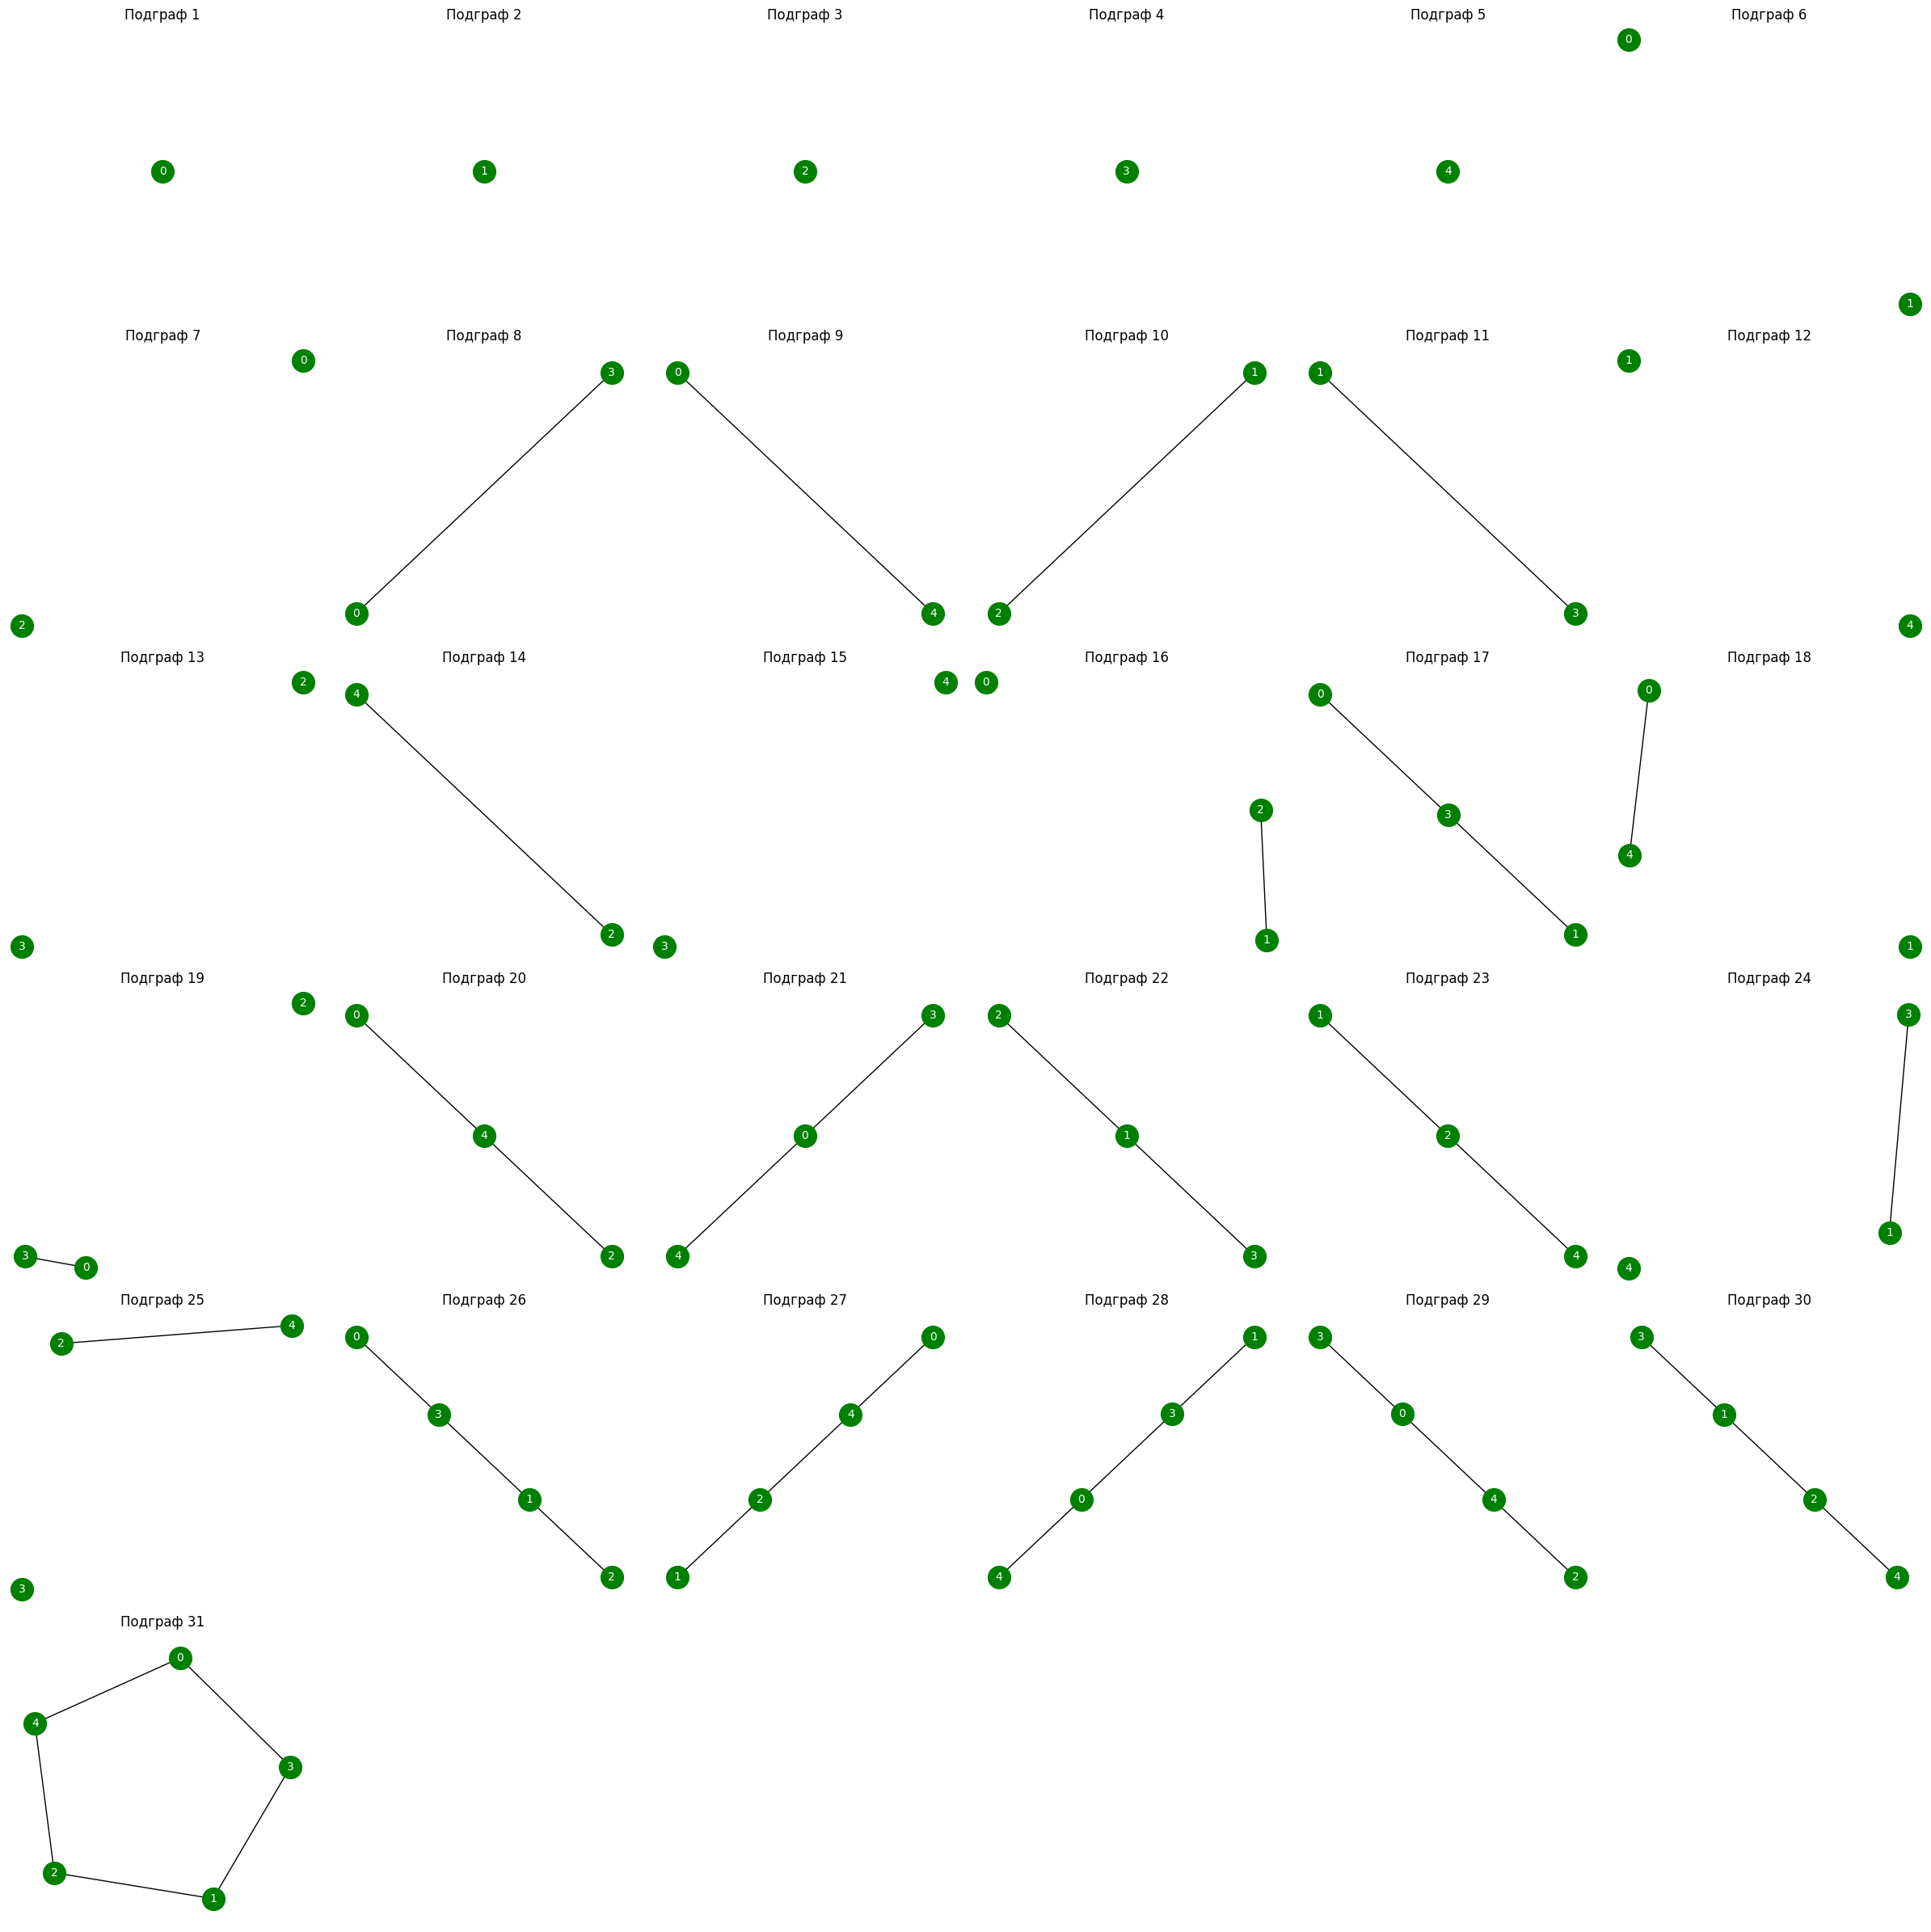

In [155]:
# Исходные данные
n = 5
edges = [(0, 3), (0, 4), (1, 2), (1, 3), (2, 4)]

# Находим все правильные подграфы
induced_subgraphs = find_induced_subgraphs(n, edges)
visualize_subgraphs(induced_subgraphs)

### Операции над графами

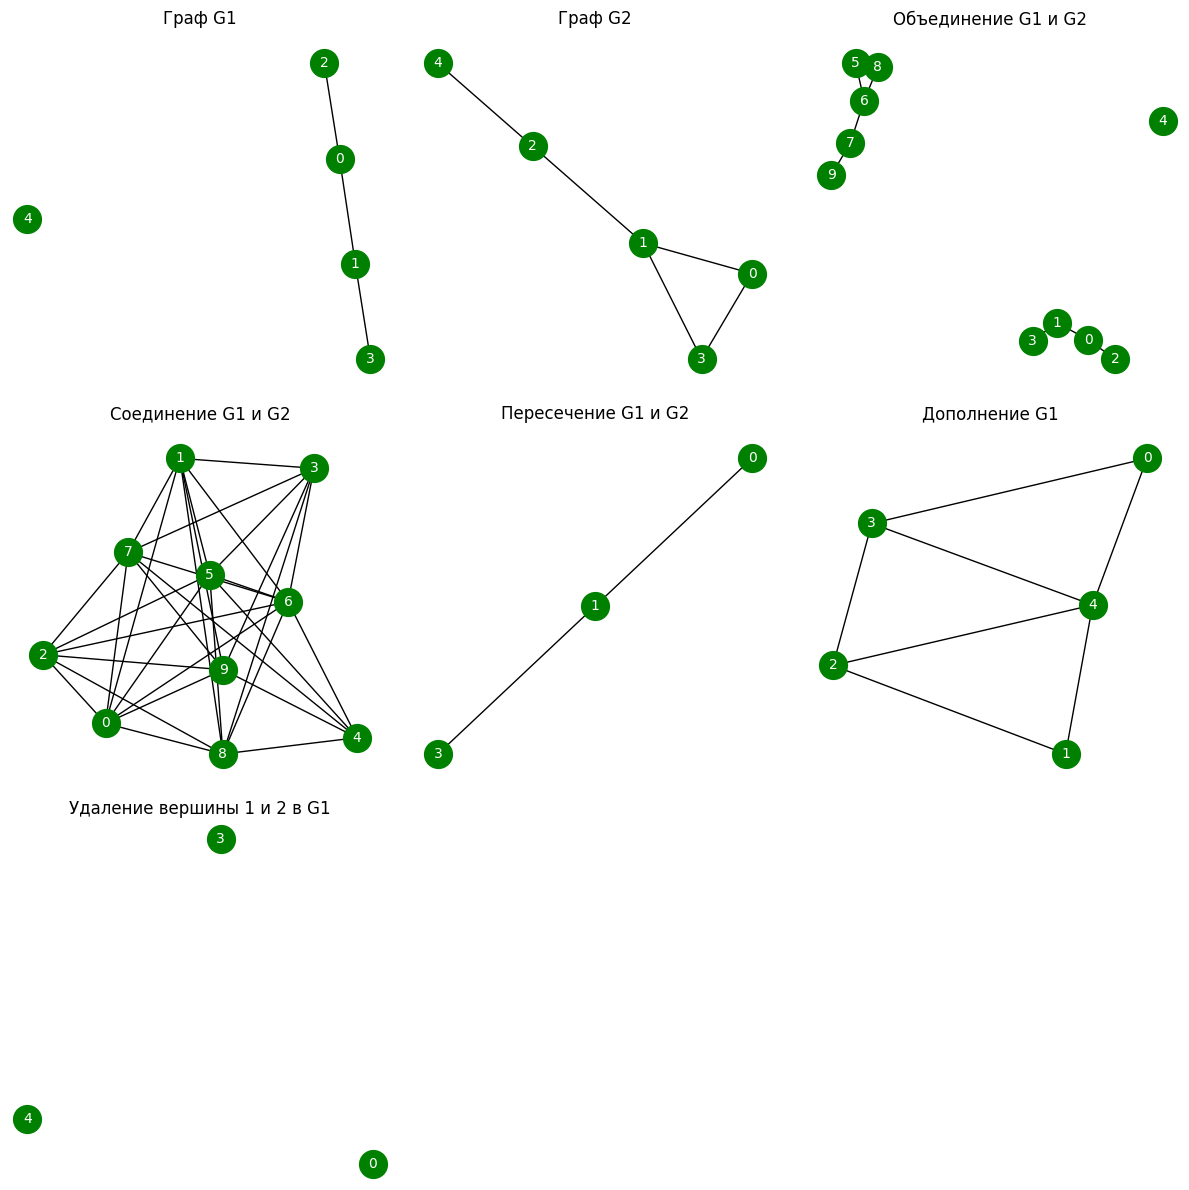

Граф G1: {0: [1, 2], 1: [0, 3], 2: [0], 3: [1], 4: []}
Граф G2: {0: [1, 3], 1: [0, 2, 3], 2: [1, 4], 3: [0, 1], 4: [2]}
Объединение G1 и G2: {0: [1, 2], 1: [0, 3], 2: [0], 3: [1], 4: [], 5: [6, 8], 6: [5, 7, 8], 7: [6, 9], 8: [5, 6], 9: [7]}
Соединение G1 и G2: {0: [1, 2, 5, 6, 7, 8, 9], 1: [0, 3, 5, 6, 7, 8, 9], 2: [0, 5, 6, 7, 8, 9], 3: [1, 5, 6, 7, 8, 9], 4: [5, 6, 7, 8, 9], 5: [6, 8, 0, 1, 2, 3, 4], 6: [5, 7, 8, 0, 1, 2, 3, 4], 7: [6, 9, 0, 1, 2, 3, 4], 8: [5, 6, 0, 1, 2, 3, 4], 9: [7, 0, 1, 2, 3, 4]}
Пересечение G1 и G2: {0: [1], 1: [0, 3], 3: [1]}
Дополнение G1: {0: [3, 4], 1: [2, 4], 2: [1, 3, 4], 3: [0, 2, 4], 4: [0, 1, 2, 3]}
Удаление вершины 1 и 2 в G1: {0: [], 3: [], 4: []}


In [156]:
# Данные графов
n1, edges1 = 5, [(0, 1), (0, 2), (1, 3)]
n2, edges2 = 5, [(0, 1), (0, 3), (1, 2), (1, 3), (2, 4)]

# Создаем графы с помощью списка смежности
G1 = create_graph(n1, edges1)
G2 = create_graph(n2, edges2)

# Выполняем операции
union_graph = disjoint_union(G1, G2)
join_graph = join(G1, G2)
intersection_graph = intersection(G1, G2)
complement_graph = complement(n1, G1)
G1_removed = remove_vertices(G1, [1, 2])

# Переводим графы в формат NetworkX
nx_G1 = adjacency_to_nx(G1)
nx_G2 = adjacency_to_nx(G2)
nx_union = adjacency_to_nx(union_graph)
nx_join = adjacency_to_nx(join_graph)
nx_intersection = adjacency_to_nx(intersection_graph)
nx_complement = adjacency_to_nx(complement_graph)
nx_G1_removed = adjacency_to_nx(G1_removed)

graphs = [
    (nx_G1, "Граф G1"),
    (nx_G2, "Граф G2"),
    (nx_union, "Объединение G1 и G2"),
    (nx_join, "Соединение G1 и G2"),
    (nx_intersection, "Пересечение G1 и G2"),
    (nx_complement, "Дополнение G1"),
    (nx_G1_removed, "Удаление вершины 1 и 2 в G1"),
]

visualize_subgraphs(graphs)

# Вывод данных для проверки
print("Граф G1:", G1)
print("Граф G2:", G2)
print("Объединение G1 и G2:", union_graph)
print("Соединение G1 и G2:", join_graph)
print("Пересечение G1 и G2:", intersection_graph)
print("Дополнение G1:", complement_graph)
print("Удаление вершины 1 и 2 в G1:", G1_removed)

### Поиск в глубину (или в ширину)

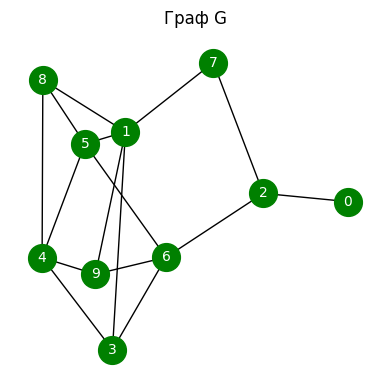

Граф G: {0: [2], 1: [3, 5, 7, 8, 9], 2: [0, 6, 7], 3: [1, 4, 6], 4: [3, 5, 8, 9], 5: [1, 4, 6, 8], 6: [2, 3, 5, 9], 7: [1, 2], 8: [1, 4, 5], 9: [1, 4, 6]}
Обход в ширину (BFS): [0, 2, 6, 7, 3, 5, 9, 1, 4, 8]
Обход в глубину (DFS): [0, 2, 7, 1, 9, 4, 8, 5, 3, 6]


In [157]:
n = 10
edges = [(0, 2), (1, 3), (1, 5), (1, 7), (1, 8), (1, 9), (2, 6), (2, 7), (3, 4), (3, 6), (4, 5), (4, 8), (4, 9), (5, 6),
         (5, 8), (6, 9)]

G = create_graph(n, edges)
nx_G = adjacency_to_nx(G)
visualize_subgraphs([(nx_G, "Граф G"), ])

# Вызов обхода
start = 0
bfs_result = graph_traversal(G, start, method="bfs")
dfs_result = graph_traversal(G, start, method="dfs")

print("Граф G:", G)
print("Обход в ширину (BFS):", bfs_result)
print("Обход в глубину (DFS):", dfs_result)

# Task 3

In [158]:
from Task3 import *

### Генерация произвольного неориентированного графа

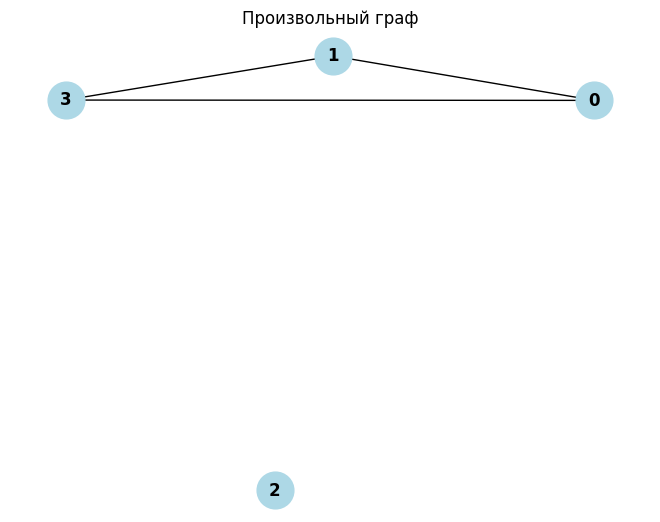

In [159]:
n = 4
density = 0.5

graph = generate_random_graph(n, density)
visualize_graph(graph, title=f"Произвольный граф")

### Генерация графа Турана 

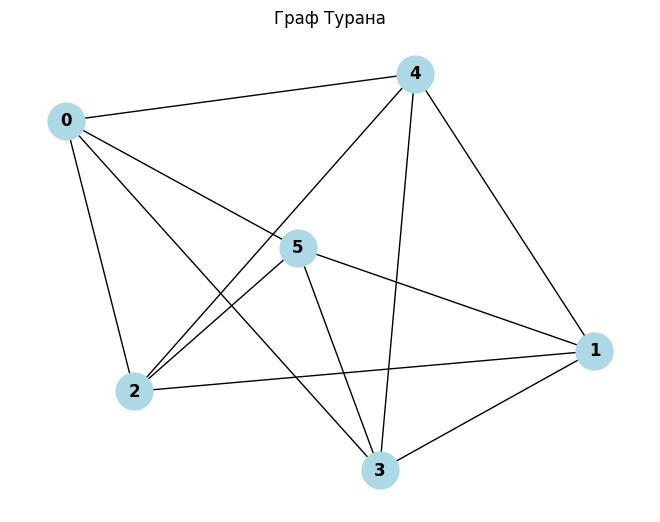

In [160]:
n = 6
r = 3

graph = turan_graph(n, r)
visualize_graph(graph, title= f"Граф Турана")

# Task 4

In [161]:
from Task4 import *

In [162]:
n = 5
edges = [(0, 2), (2, 3), (2, 4)]

### Алгоритм "полного перебора" для нахождения наибольшего независимого множества вершин в графе

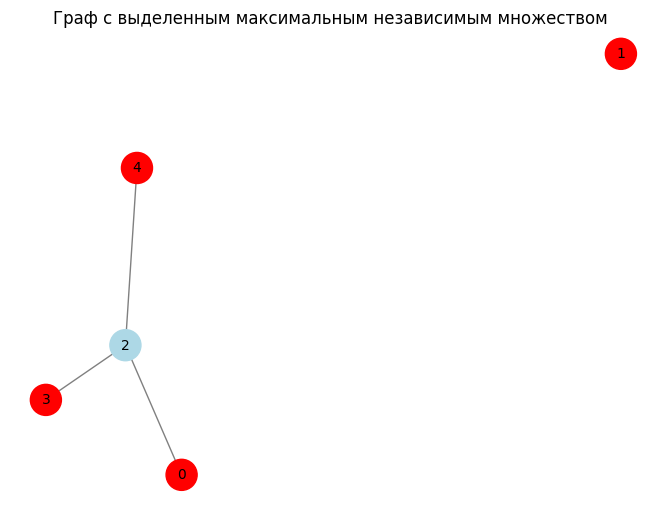

Наибольшее независимое множество вершин: {0, 1, 3, 4}


In [163]:
result = find_max_independent_set_bruteforce(n, edges)
visualize_graph(n, edges, result)
print("Наибольшее независимое множество вершин:", result)

### Алгоритм "поиска с возвратом" для нахождения наибольшего независимого множества вершин в графе

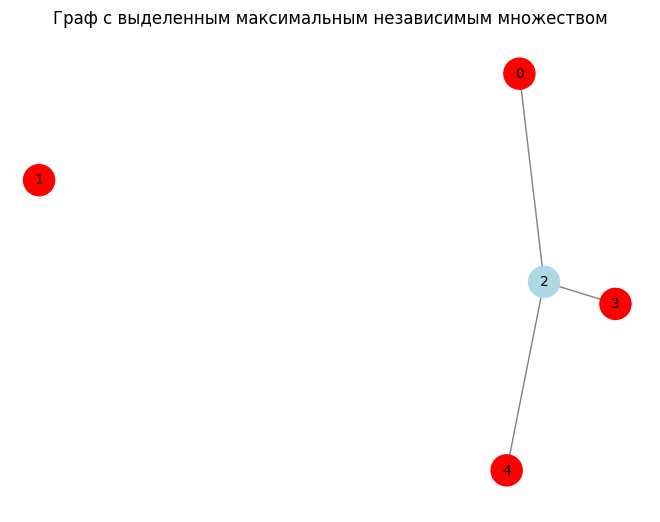

Наибольшее независимое множество вершин: {0, 1, 3, 4}


In [164]:
result = find_max_independent_set_backtracking(n, edges)
visualize_graph(n, edges, result)
print("Наибольшее независимое множество вершин:", result)

# Task 5

In [165]:
from Task5 import *

In [166]:
# n = 9
# edges = [(0, 1), (0, 2), (0, 4), (0, 8), (1, 2), (1, 4), (1, 8), (2, 5), (2, 8), (3, 6), (3, 7), (3, 8), (4, 8), (5, 6),
#          (5, 7)]

# Task 6

In [167]:
from Task6 import *

In [168]:
n = 5
edges = [
    (0, 1, 2), (0, 2, 9), (0, 3, 10), (0, 4, 7),
    (1, 2, 6), (1, 3, 4), (1, 4, 3),
    (2, 3, 8), (2, 4, 5),
    (3, 4, 1)
]

### Жадный алгоритм ближайшего соседа

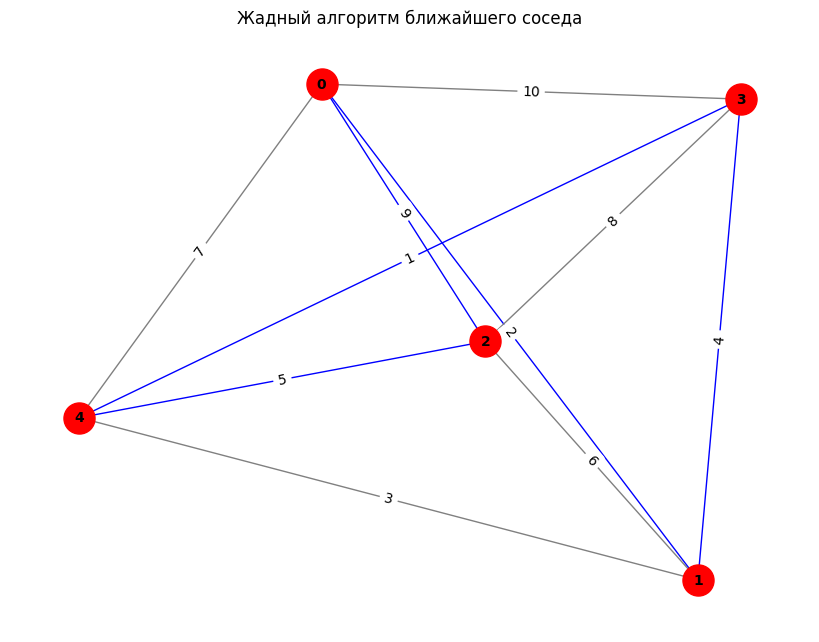

Оптимальный маршрут: [4, 3, 1, 0, 2, 4]
Длина маршрута: 21


In [169]:
path, length = nearest_neighbor(n, edges, start_node=4)
visualize_nearest_neighbor(n, edges, path)

print("Оптимальный маршрут:", path)
print("Длина маршрута:", length)